## Start Up Report

In [21]:
import numpy as np
import scipy.optimize as optim
import numpy as np
import simulation as simu
import VL0 as VL
import scipy.linalg as la
import matplotlib.pyplot as plt

#### 1. Plot $S_{t,1}$ and $S_{t,2}$ over time and histograms

##### a) number of patients: 25; Time steps: 48; dim of state: 2; dim of action: 2

In [7]:
n25_T48 = simu.stable_simu(25,48,.5,2)
st_2548, act_2548 = n25_T48
act_2548_1hot = VL.a1hot(act_2548,2)
print(st_2548.shape,act_2548.shape,act_2548_1hot.shape)
## State matrix: n*T*nS
## Action matrix: n*(T-1)
## Action (one hot coding): n*(T-1)*nA
util_2548 = simu.est_util(st_2548,act_2548)
print(util_2548.shape)

(25, 48, 2) (25, 47) (25, 47, 2)
(25, 47)


In [8]:
def plot_lines(s,u):
    n,T,nS = s.shape
    fig_state, (ax0, ax1) = plt.subplots(2, 1, sharex=True, constrained_layout=True)

# S_t1
    for i in range(n):
        ax0.plot(range(T), s[i,:,0])
    ax0.set_ylabel('S_t1')

# S_t2
    for i in range(n):
        ax1.plot(range(T), s[i,:,1])
    ax1.set_ylabel('S_t2')
# Utility
    fig_utility, u0 = plt.subplots()
    u0.plot(u.reshape(u.shape[1],u.shape[0]))
    u0.set_ylabel("Utility over time")

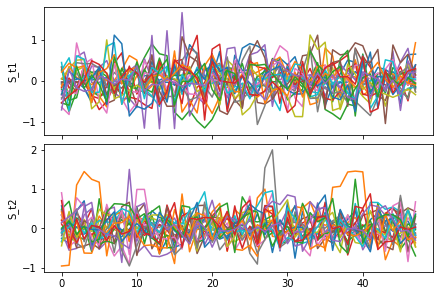

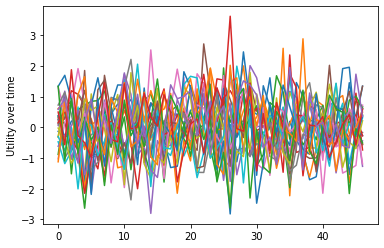

In [9]:
plot_lines(st_2548,util_2548)

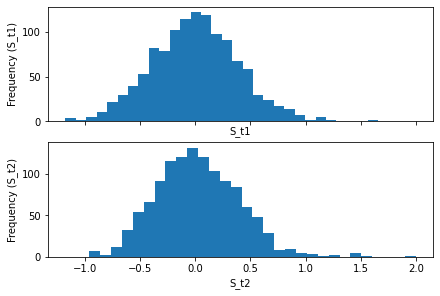

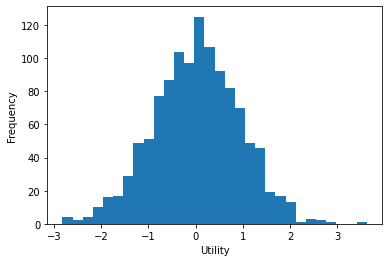

In [47]:
def plot_hist(s,u):
    fig_state_hist, (ah0, ah1) = plt.subplots(2, 1, sharex=True, constrained_layout=True)
# S_t1
    ah0.hist(np.concatenate(s[:,:,0]),bins = 30)
    ah0.set_xlabel('S_t1')
    ah0.set_ylabel('Frequency (S_t1)')


# S_t2
    ah1.hist(np.concatenate(s[:,:,1]),bins = 30)
    ah1.set_xlabel('S_t2')
    ah1.set_ylabel('Frequency (S_t2)')

# reward
    fig_util,ah2 = plt.subplots()
    ah2.hist(np.concatenate(u),bins=30)
    ah2.set_xlabel('Utility')
    ah2.set_ylabel('Frequency')

plot_hist(st_2548,util_2548)

#### b) Plots include burn-in: **T=98**

In [11]:
n25_T98 = simu.simu2d(25,98)
st_2598, act_2598 = n25_T98
print(st_2598.shape,act_2598.shape)
util_2598 = simu.est_util(st_2598,act_2598)
print(util_2598.shape)

(25, 98, 2) (25, 97)
(25, 97)


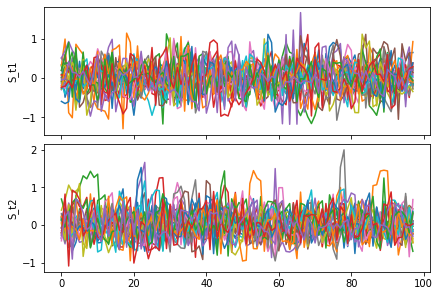

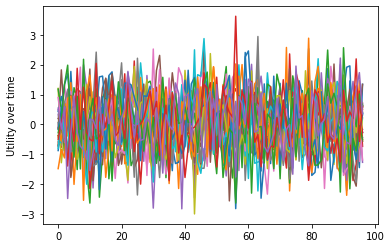

In [12]:
plot_lines(st_2598,util_2598)

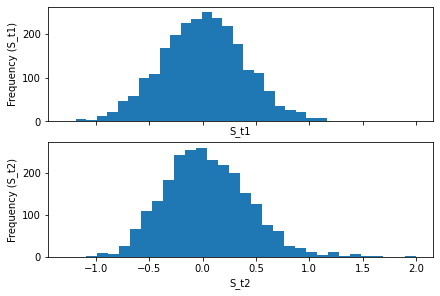

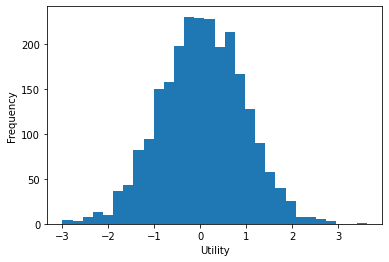

In [48]:
plot_hist(st_2598,util_2598)

(98, 2) (97,)


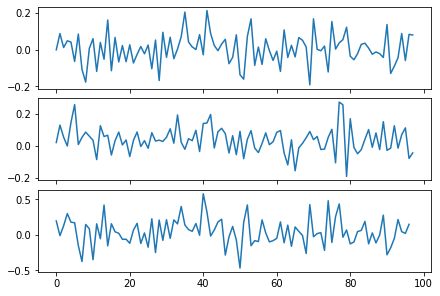

In [60]:
st_mean_T = np.mean(st_2598,axis=0)
util_mean_T = np.mean(util_2598,axis=0)
print(st_mean_T.shape,util_mean_T.shape)
fig_burnin, (f1,f2,f3) = plt.subplots(3, 1, sharex=True, constrained_layout=True)
f1.plot(st_mean_T[:,0])
f2.plot(st_mean_T[:,1])
f3.plot(util_mean_T)

#### 2. $S_{t,1}, S_{t,2} \in \{\pm 1\}; T=10 $; No error invluded

In [33]:
'''S1=S2=1'''
start11 = simu.multi_start(25,1,1,24)
s11, a11 = start11
util_11 = simu.est_util(s11,a11)
print(s11.shape)
print(np.mean(util_11))

(25, 24, 2)
0.021643049528298056


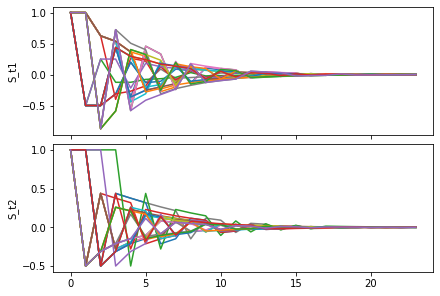

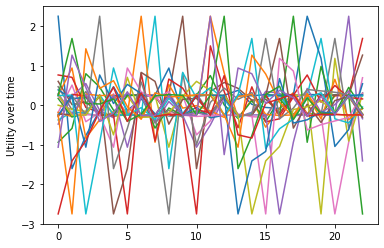

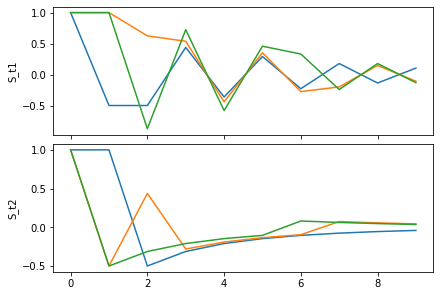

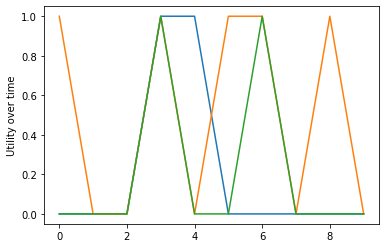

In [43]:
plot_lines(s11,util_11)
plot_lines(s11[0:3,0:10,:],a11[0:3,0:10])

0.047286682651045034

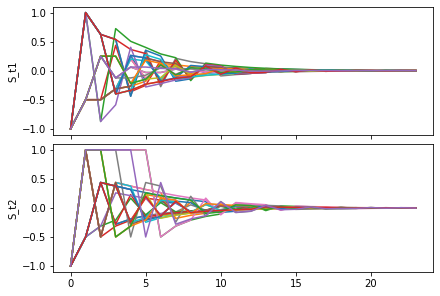

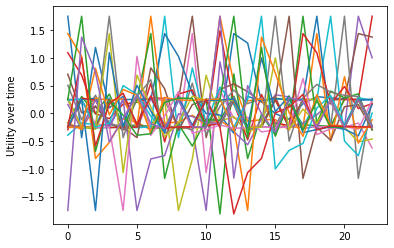

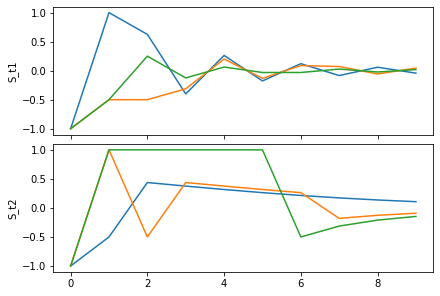

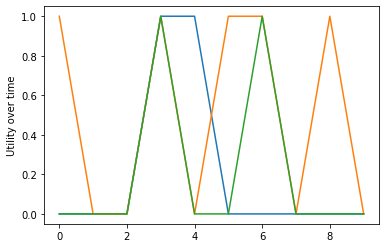

In [42]:
'''S1=S2=-1'''
start_1_1 = simu.multi_start(25,-1,-1,24)
s_1_1, a_1_1 = start_1_1
util_1_1 = simu.est_util(s_1_1,a_1_1)
plot_lines(s_1_1,util_1_1)
plot_lines(s_1_1[0:3,0:10,:],a_1_1[0:3,0:10])
np.mean(util_1_1)

-0.033597564613766236

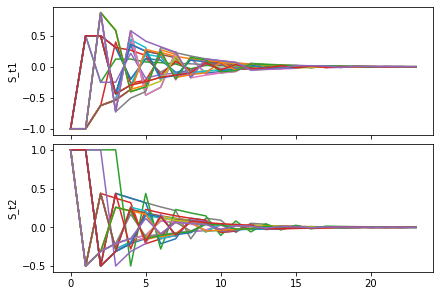

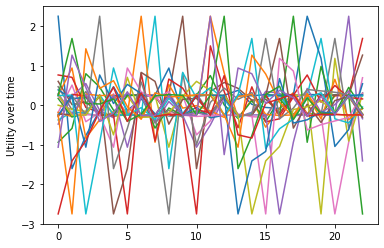

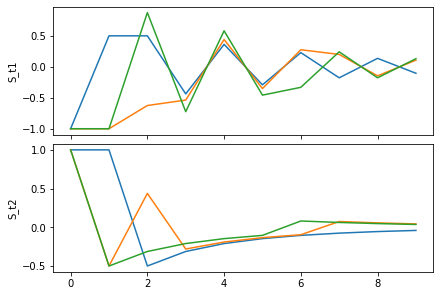

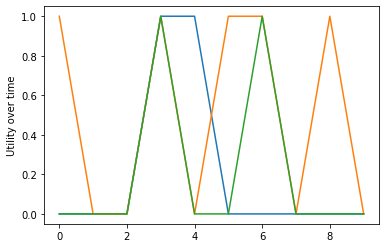

In [44]:
'''s1=-1,s2=1'''
start_11 = simu.multi_start(25,-1,1,24)
s_11, a_11 = start_11
util_11 = simu.est_util(s_11,a_11)
plot_lines(s_11,util_11)
plot_lines(s_11[0:3,0:10,:],a_11[0:3,0:10])
np.mean(util_11)

0.014078292696469841

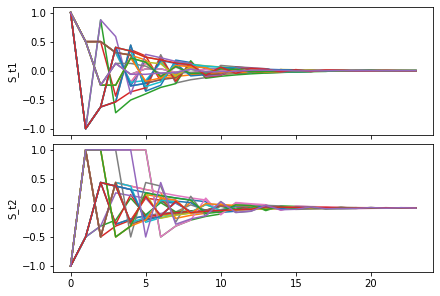

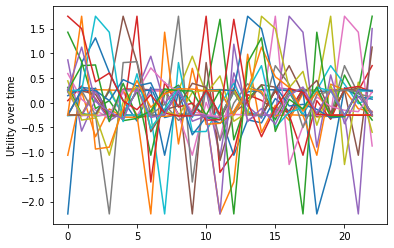

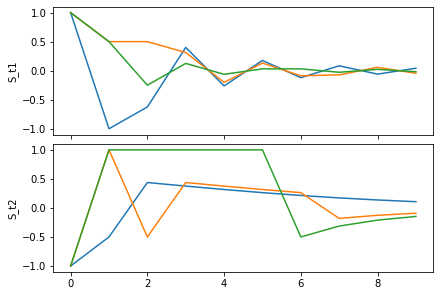

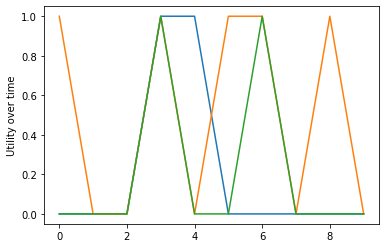

In [41]:
'''s1=1,s2=-1'''
start1_1 = simu.multi_start(25,1,-1,24)
s1_1, a1_1 = start1_1
util1_1 = simu.est_util(s1_1,a1_1)
plot_lines(s1_1,util1_1)
plot_lines(s1_1[0:3,0:10,:],a1_1[0:3,0:10])
np.mean(util1_1)